In [1]:
### PYCHARM ###


import fastai
import torch
from fastai.vision.all import *
from fastai.callback.fp16 import *


from IPython.display import clear_output, DisplayHandle
def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)
DisplayHandle.update = update_patch


path = "dataset_CIFAR10"


In [2]:
### COLAB ###
"""
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
from fastbook import *
fastbook.setup_book()
from fastai.callback.fp16 import *

!unzip /content/gdrive/MyDrive/dataset_CIFAR10.zip
path = "/content/"
"""

'\n! [ -e /content ] && pip install -Uqq fastbook\nimport fastbook\nfrom fastbook import *\nfastbook.setup_book()\nfrom fastai.callback.fp16 import *\n\n!unzip /content/gdrive/MyDrive/dataset_CIFAR10.zip\npath = "/content/"\n'

In [3]:
#check if cuda is available
torch.cuda.is_available()


True

In [4]:
#clean up memory
num_gpus = torch.cuda.device_count()
for gpu_id in range(num_gpus):
    torch.cuda.set_device(gpu_id)
    torch.cuda.empty_cache()

In [5]:
dls = ImageDataLoaders.from_folder(
    path=path,
    train='train',
    valid='validation',
    seed=42,
    #item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224),
    #batch_tfms=aug_transforms(size=224, min_scale=0.75),
    bs = 64
)

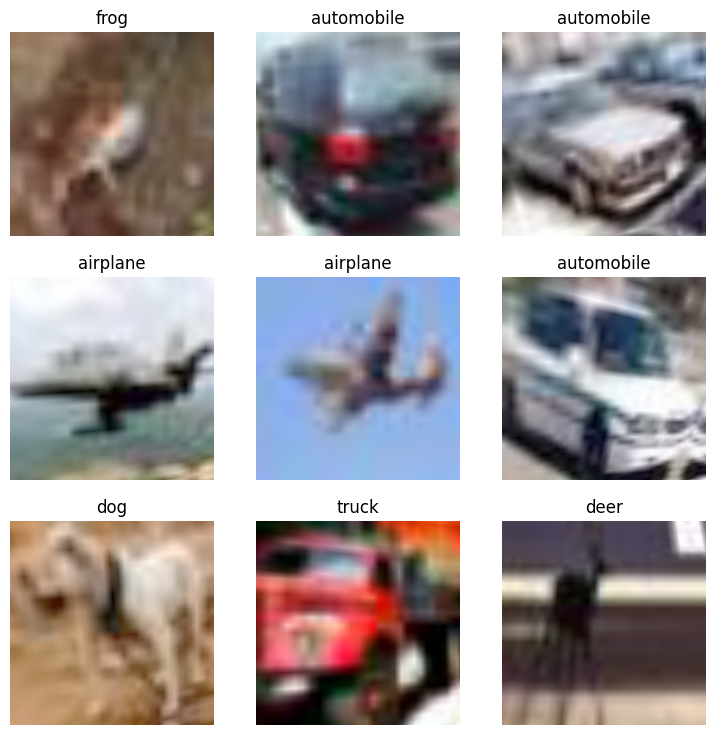

In [6]:
dls.show_batch()

In [7]:
learn = vision_learner(dls, resnet50, metrics=[accuracy, error_rate], ).to_fp16()
learn.fine_tune(6, freeze_epochs=3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.447560,0.321390,0.890100,0.109900,02:32
1,0.400442,0.359665,0.879300,0.120700,02:32
2,0.298007,0.273574,0.906200,0.093800,02:33
3,0.196470,0.242715,0.921800,0.078200,02:32
4,0.112516,0.212700,0.933700,0.066300,02:31
5,0.069002,0.205207,0.936700,0.063300,02:31


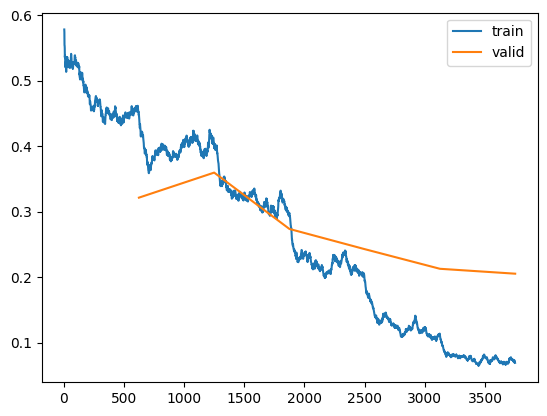

In [8]:
#plot loss and accuracy
learn.recorder.plot_loss()

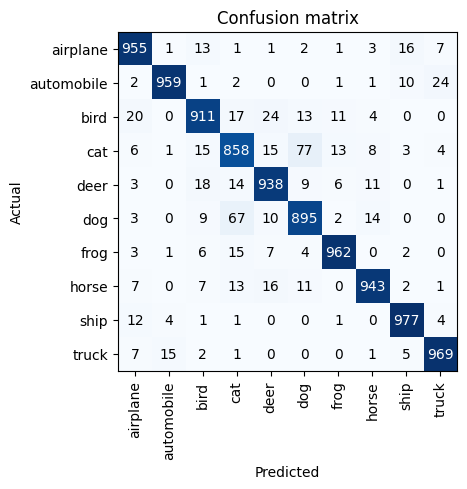

In [9]:
#plot confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

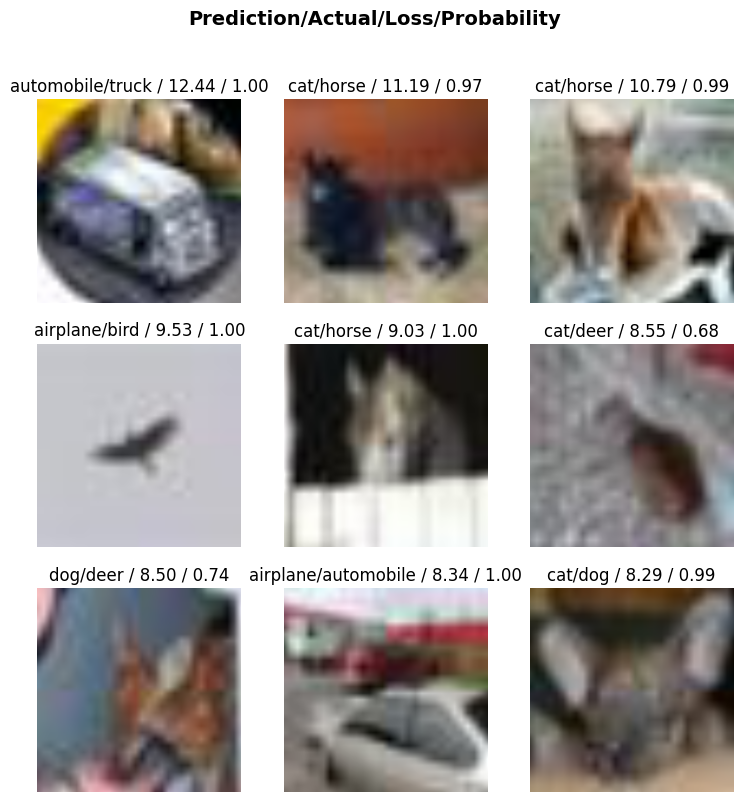

In [10]:
#plot top losses
interp.plot_top_losses(9, nrows=3)